# Analyzing the Democratic Debate

In [1]:
import requests
from lxml import html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
import re

%matplotlib inline

In [2]:
url = "https://www.washingtonpost.com/news/the-fix/wp/2016/01/17/the-4th-democratic-debate-transcript-annotated-who-said-what-and-what-it-meant/"
response = requests.get(url)

In [3]:
doc = html.fromstring(response.text)

In [4]:
para_list = doc.xpath("//article/p/text()")

In [5]:
para_list = para_list[2:]

In [6]:
pprint(para_list[:2], compact=True)
print(para_list[-2:])

["HOLT: We'll begin with 45 second opening statements from each candidate, "
 'starting with Secretary Clinton. ',
 'CLINTON: Well, good evening. And I want to thank the Congressional Black '
 'Caucus Institute and the people of Charleston for hosting us here on the '
 'eve of Martin Luther King Day tomorrow. ']
['HOLT: All right. Well thank you and thanks to all of you for being here tonight shedding light on some of the differences as Americans get ready to vote. ', "I also want to thank the Congressional Black Caucus Institute and certainly my friend and colleague, Andrea Mitchell. This has been great. It's been a great spirited conversation and American people appreciate it. "]


In [7]:
dataset = pd.DataFrame(para_list, columns=["raw"])
dataset

,raw
0,HOLT: We'll begin with 45 second opening state...
1,"CLINTON: Well, good evening. And I want to tha..."
2,"You know, I remember well when my youth minist..."
3,And that is our fight still. We have to get th...
4,I understand that this is the hardest job in t...
5,(APPLAUSE)
6,"HOLT: Thank you. Senator Sanders, your opening..."
7,SANDERS: Thank you. As we honor the extraordin...
8,"SANDERS: And then, to make a bad situation wor..."
9,This campaign is about a political revolution ...


In [8]:
def get_name(x):
    r = re.findall(r"^([A-Z']*):", x)
    if r:
        return r[0]
    else:
        return np.NaN

In [9]:
dataset["speaker"] = dataset.raw.apply(get_name).fillna(method='ffill')
dataset

,raw,speaker
0,HOLT: We'll begin with 45 second opening state...,HOLT
1,"CLINTON: Well, good evening. And I want to tha...",CLINTON
2,"You know, I remember well when my youth minist...",CLINTON
3,And that is our fight still. We have to get th...,CLINTON
4,I understand that this is the hardest job in t...,CLINTON
5,(APPLAUSE),CLINTON
6,"HOLT: Thank you. Senator Sanders, your opening...",HOLT
7,SANDERS: Thank you. As we honor the extraordin...,SANDERS
8,"SANDERS: And then, to make a bad situation wor...",SANDERS
9,This campaign is about a political revolution ...,SANDERS


In [10]:
dataset.speaker.value_counts()

SANDERS     168
HOLT        152
CLINTON     131
O'MALLEY    113
MITCHELL     43
TODD          7
BROWNLEE      4
FRANTA        2
MILLER        2
Name: speaker, dtype: int64

In [11]:
get_speach = lambda x: re.sub("^[A-Z']*:\s", "", x)
dataset["speach"] = dataset.raw.apply(get_speach)
dataset

,raw,speaker,speach
0,HOLT: We'll begin with 45 second opening state...,HOLT,We'll begin with 45 second opening statements ...
1,"CLINTON: Well, good evening. And I want to tha...",CLINTON,"Well, good evening. And I want to thank the Co..."
2,"You know, I remember well when my youth minist...",CLINTON,"You know, I remember well when my youth minist..."
3,And that is our fight still. We have to get th...,CLINTON,And that is our fight still. We have to get th...
4,I understand that this is the hardest job in t...,CLINTON,I understand that this is the hardest job in t...
5,(APPLAUSE),CLINTON,(APPLAUSE)
6,"HOLT: Thank you. Senator Sanders, your opening...",HOLT,"Thank you. Senator Sanders, your opening state..."
7,SANDERS: Thank you. As we honor the extraordin...,SANDERS,Thank you. As we honor the extraordinary life ...
8,"SANDERS: And then, to make a bad situation wor...",SANDERS,"And then, to make a bad situation worse, we ha..."
9,This campaign is about a political revolution ...,SANDERS,This campaign is about a political revolution ...


In [12]:
applause_ds = dataset[dataset.speach == "(APPLAUSE)"]
len(applause_ds)

34

In [13]:
applause_ds.speaker.value_counts()

SANDERS     12
CLINTON     12
O'MALLEY     7
HOLT         3
Name: speaker, dtype: int64

HOLT         3
O'MALLEY     7
SANDERS     12
CLINTON     12
Name: speaker, dtype: int64

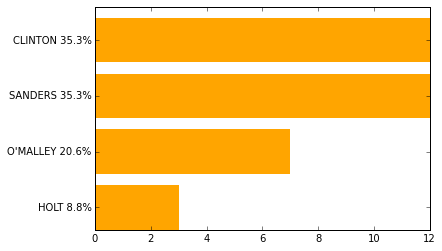

In [14]:
applause_counts = applause_ds.speaker.value_counts().sort_values()

bottom = [index for index, item in enumerate(applause_counts.index)]
plt.barh(bottom, width=applause_counts, color="orange", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*applause_counts[item]/len(applause_ds)) for index,item in enumerate(applause_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

applause_counts

In [15]:
word_count = lambda x: len(re.findall("[A-Z]{2,}(?![a-z])|[A-Z][a-z]+(?=[A-Z])|[\'\w\-]+",x))

In [16]:
dataset["word_count"] = dataset.speach.apply(word_count)
dataset

,raw,speaker,speach,word_count
0,HOLT: We'll begin with 45 second opening state...,HOLT,We'll begin with 45 second opening statements ...,14
1,"CLINTON: Well, good evening. And I want to tha...",CLINTON,"Well, good evening. And I want to thank the Co...",31
2,"You know, I remember well when my youth minist...",CLINTON,"You know, I remember well when my youth minist...",67
3,And that is our fight still. We have to get th...,CLINTON,And that is our fight still. We have to get th...,50
4,I understand that this is the hardest job in t...,CLINTON,I understand that this is the hardest job in t...,42
5,(APPLAUSE),CLINTON,(APPLAUSE),1
6,"HOLT: Thank you. Senator Sanders, your opening...",HOLT,"Thank you. Senator Sanders, your opening state...",8
7,SANDERS: Thank you. As we honor the extraordin...,SANDERS,Thank you. As we honor the extraordinary life ...,88
8,"SANDERS: And then, to make a bad situation wor...",SANDERS,"And then, to make a bad situation worse, we ha...",28
9,This campaign is about a political revolution ...,SANDERS,This campaign is about a political revolution ...,18


In [17]:
words_ds = dataset[dataset.speaker.isin(["CLINTON","SANDERS","O'MALLEY"])]

speaker
O'MALLEY    25.115044
SANDERS     27.351190
CLINTON     32.656489
Name: word_count, dtype: float64

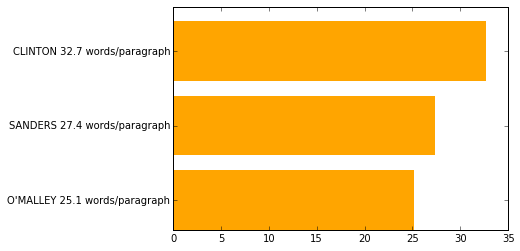

In [18]:
words_counts = words_ds.pivot_table(values="word_count", index="speaker", columns=None, aggfunc='mean',).sort_values()

bottom = [index for index, item in enumerate(words_counts.index)]
plt.barh(bottom, width=words_counts, color="orange", linewidth=0)

y_labels = ["%s %.1f words/paragraph" % (item, words_counts[item]) for index,item in enumerate(words_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

words_counts

speaker
O'MALLEY    2838
CLINTON     4278
SANDERS     4595
Name: word_count, dtype: int64

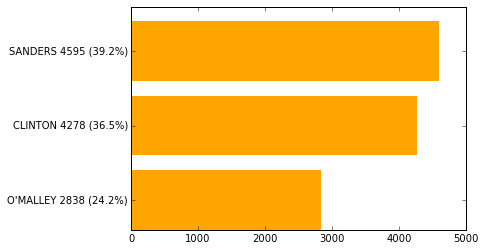

In [19]:
words_counts = words_ds.pivot_table(values="word_count", index="speaker", columns=None, aggfunc='sum',).sort_values()

bottom = [index for index, item in enumerate(words_counts.index)]
plt.barh(bottom, width=words_counts, color="orange", linewidth=0)

y_labels = ["%s %d (%.1f%%)" % (item, words_counts[item], 100.0*words_counts[item]/np.sum(words_counts)) for index,item in enumerate(words_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

words_counts

In [20]:
speaker_dict = {value:index for index,value in enumerate(words_ds.speaker.unique())}
speaker_dict

{'CLINTON': 0, "O'MALLEY": 2, 'SANDERS': 1}

In [21]:
words_ds["speaker_no"] = words_ds.speaker.map(speaker_dict)
words_ds

-c:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,raw,speaker,speach,word_count,speaker_no
1,"CLINTON: Well, good evening. And I want to tha...",CLINTON,"Well, good evening. And I want to thank the Co...",31,0
2,"You know, I remember well when my youth minist...",CLINTON,"You know, I remember well when my youth minist...",67,0
3,And that is our fight still. We have to get th...,CLINTON,And that is our fight still. We have to get th...,50,0
4,I understand that this is the hardest job in t...,CLINTON,I understand that this is the hardest job in t...,42,0
5,(APPLAUSE),CLINTON,(APPLAUSE),1,0
7,SANDERS: Thank you. As we honor the extraordin...,SANDERS,Thank you. As we honor the extraordinary life ...,88,1
8,"SANDERS: And then, to make a bad situation wor...",SANDERS,"And then, to make a bad situation worse, we ha...",28,1
9,This campaign is about a political revolution ...,SANDERS,This campaign is about a political revolution ...,18,1
13,O'MALLEY: Thank you. My name is Martin O'Malle...,O'MALLEY,"Thank you. My name is Martin O'Malley, I was b...",21,2
14,And I want to thank the people of South Caroli...,O'MALLEY,And I want to thank the people of South Caroli...,38,2


In [22]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(words_ds.speach)
count_matrix = count_matrix.toarray()

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0)
word_count = word_count.sort_values(by="count", ascending=False).reset_index(drop=True)
word_count[:]

,word,count
0,the,546
1,to,414
2,and,362
3,of,293
4,we,280
5,that,274
6,in,223
7,is,157
8,have,144
9,it,126


In [23]:
cl = MultinomialNB()
cl.fit(count_matrix, words_ds.speaker=="SANDERS")

df_vocab = pd.DataFrame(list(cv.vocabulary_.keys()), columns=["Vocab"])
df_vocab["Vocab_index"] = cv.vocabulary_.values()
df_vocab = df_vocab.sort_values("Vocab_index").reset_index(drop=True)
df_vocab["proba"] = cl.feature_log_prob_[0]
df_vocab["anti_proba"] = cl.feature_log_prob_[1]
df_vocab["difference"] = cl.feature_log_prob_[0] - cl.feature_log_prob_[1]
df_vocab.sort_values("difference", ascending=True)

,Vocab,Vocab_index,proba,anti_proba,difference
1064,major,1064,-9.080573,-6.454097,-2.626476
759,goldman,759,-9.080573,-6.677241,-2.403332
1507,sachs,1507,-9.080573,-6.677241,-2.403332
423,countries,423,-9.080573,-6.810772,-2.269801
406,contributions,406,-9.080573,-6.810772,-2.269801
418,corrupt,418,-9.080573,-6.810772,-2.269801
1627,spending,1627,-9.080573,-6.964923,-2.115650
381,companies,381,-9.080573,-6.964923,-2.115650
1411,real,1411,-9.080573,-6.964923,-2.115650
1852,vermont,1852,-9.080573,-6.964923,-2.115650


In [24]:
cl = MultinomialNB()
cl.fit(count_matrix, words_ds.speaker=="CLINTON")

df_vocab = pd.DataFrame(list(cv.vocabulary_.keys()), columns=["Vocab"])
df_vocab["Vocab_index"] = cv.vocabulary_.values()
df_vocab = df_vocab.sort_values("Vocab_index").reset_index(drop=True)
df_vocab["proba"] = cl.feature_log_prob_[0]
df_vocab["anti_proba"] = cl.feature_log_prob_[1]
df_vocab["difference"] = cl.feature_log_prob_[0] - cl.feature_log_prob_[1]
df_vocab.sort_values("difference", ascending=True)

,Vocab,Vocab_index,proba,anti_proba,difference
553,dodd,553,-9.111183,-6.410175,-2.701008
1799,try,1799,-9.111183,-6.921001,-2.190182
718,frank,718,-8.418036,-6.314865,-2.103171
1925,white,1925,-9.111183,-7.103322,-2.007861
1287,pleased,1287,-9.111183,-7.103322,-2.007861
1608,someone,1608,-9.111183,-7.103322,-2.007861
1628,spent,1628,-9.111183,-7.103322,-2.007861
625,especially,625,-9.111183,-7.103322,-2.007861
927,introduced,927,-9.111183,-7.103322,-2.007861
1487,rights,1487,-8.418036,-6.515535,-1.902500


In [25]:
cl = MultinomialNB()
cl.fit(count_matrix, words_ds.speaker=="O'MALLY")

df_vocab = pd.DataFrame(list(cv.vocabulary_.keys()), columns=["Vocab"])
df_vocab["Vocab_index"] = cv.vocabulary_.values()
df_vocab = df_vocab.sort_values("Vocab_index").reset_index(drop=True)
df_vocab["proba"] = cl.feature_log_prob_[0]
df_vocab["anti_proba"] = cl.feature_log_prob_[1]
df_vocab["difference"] = cl.feature_log_prob_[0] - cl.feature_log_prob_[1]
df_vocab.sort_values("difference", ascending=True)

,Vocab,Vocab_index,proba,anti_proba,difference
983,knew,983,-8.792398,-7.584773,-1.207625
1129,momentum,1129,-8.792398,-7.584773,-1.207625
1127,mom,1127,-8.792398,-7.584773,-1.207625
1124,mixed,1124,-8.792398,-7.584773,-1.207625
1122,mission,1122,-8.792398,-7.584773,-1.207625
1121,missing,1121,-8.792398,-7.584773,-1.207625
1120,minutes,1120,-8.792398,-7.584773,-1.207625
1119,minus,1119,-8.792398,-7.584773,-1.207625
1131,months,1131,-8.792398,-7.584773,-1.207625
1116,mindful,1116,-8.792398,-7.584773,-1.207625
